In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.insert(0, '../../../src')

In [3]:
from importlib import reload
import analysis.generic as analy
reload(analy)

<module 'analysis.generic' from '../../../src/analysis/generic.py'>

In [4]:
res={}

In [5]:
def load_npz(f, **kwargs):
    with np.load(f,**kwargs) as d:
        dat=dict(d)
    return dat

In [6]:
res["g_06"]=load_npz(
    "resu/frac_pzero_g06_i_bird_n_95_d_3_tlim_12_lam_0.06_mu_0.02_pe_1.npz")

In [7]:
res["g_08"]=load_npz(
    "resu/frac_pzero_g08_i_bird_n_95_d_3_tlim_12_lam_0.0008_mu_0.02_pe_1.npz")

In [49]:
res["g_10"]=load_npz(
    "resu/frac_pzero_g1_i_bird_n_95_d_3_tlim_12_lam_0.5_mu_0.02_pe_1.npz")

In [8]:
res["g_12"]=load_npz(
    "resu/frac_pzero_g12_i_bird_n_95_d_3_tlim_12_lam_0.0012_mu_0.02_pe_1.npz")

In [9]:
res["g_14"]=load_npz(
    "resu/frac_pzero_g14_i_bird_n_95_d_3_tlim_12_lam_0.14_mu_0.02_pe_1.npz")

In [122]:
NINF={}
NINF["g_06"]=np.load("resu/ninf_i_bird_n_95_d_3_tlim_12_lam_0.06_mu_0.02_pe_1.0.npy")
NINF["g_08"] = np.load(
    "resu/ninf_i_bird_n_95_d_3_tlim_12_lam_0.0008_mu_0.02_pe_1.0.npy")
NINF["g_10"] =np.load("resu/ninf_i_bird_n_95_d_3_tlim_12_lam_0.5_mu_0.02_pe_1.npy")
NINF["g_12"] = np.load(
    "resu/ninf_i_bird_n_95_d_3_tlim_12_lam_0.0012_mu_0.02_pe_1.0.npy")
NINF["g_14"]=np.load("resu/ninf_i_bird_n_95_d_3_tlim_12_lam_0.14_mu_0.02_pe_1.0.npy")

In [131]:
NINF

{'g_06': array([ 9, 30, 20, 32,  6, 26,  5,  9, 27, 24, 11, 48,  3, 59, 26, 10, 31,
        23, 11, 22]),
 'g_08': array([41, 46, 26, 46, 54, 16, 58, 42, 15, 46, 24, 42, 49, 21, 12, 38, 19,
        58, 29, 14]),
 'g_10': array([53, 48, 66, 64, 64, 58, 59,  2, 12, 28, 50, 16, 53, 60, 17, 52, 43,
        14, 58, 47, 44, 53, 61, 16, 75, 66, 58, 63, 16, 33,  2, 64,  9, 57,
        59, 78, 68, 58, 60,  2, 66, 61, 64,  4, 69, 55, 60, 76, 65, 57, 45,
        57, 38, 10, 61, 66, 43, 65, 35, 55, 40, 36, 14, 24, 46, 19, 57, 33,
        58, 61, 58, 63, 12, 35, 52, 56, 68, 31, 36, 52, 68, 47, 21, 60, 20,
        73, 21, 36, 57, 37, 46, 66, 36, 61, 68, 57, 42, 50, 30, 28]),
 'g_12': array([65, 74, 47, 40, 50, 65, 65, 56, 44, 67, 57, 64, 53, 26, 48, 59, 29,
        70, 50, 22]),
 'g_14': array([73, 72, 67, 75, 60, 72, 73, 53, 52, 66, 57, 60, 77, 48, 45, 70, 68,
        59, 46, 57])}

In [133]:
for k in NINF:
    u=NINF[k]
    print(k, f" mean {u.mean():.2f} std {u.std():.2f}")

g_06  mean 21.60 std 14.11
g_08  mean 34.80 std 15.07
g_10  mean 46.33 std 19.63
g_12  mean 52.55 std 14.37
g_14  mean 62.50 std 9.90


In [18]:
from sklearn.metrics import roc_auc_score, auc

In [50]:
pars=dict(nbins=80)

curves={c: {al: analy.make_histo_cumsum(d[al],**pars) for al in d} for c,d in res.items()}

In [51]:
aucs={c: {al: auc(*d[al]) for al in d} for c,d in curves.items()}

In [52]:
from utils.common import pretty_print_n

In [83]:
def give_name(string):
    x=string.split("_")
    if x[0] == "ann":
        return "ANN"
    elif x[0] == "sib":
        return "SIB"
    elif x[0] == "sm":
        return f"SM [{pretty_print_n(int(x[-1]))}]"
    else:
        return string

In [84]:
names={c: {al:give_name(al) for al in d} for c,d in curves.items()}

In [96]:
gamm_v=lambda k: int(k.split("_")[-1])*1e-4

In [97]:
r=[(gamm_v(k),give_name(k1),v1) for k,v in aucs.items() for k1,v1 in v.items()]
aucs_df=pd.DataFrame(r, columns=["gamma", "algo", "AUC"])

In [98]:
import seaborn as sns

<AxesSubplot:xlabel='gamma'>

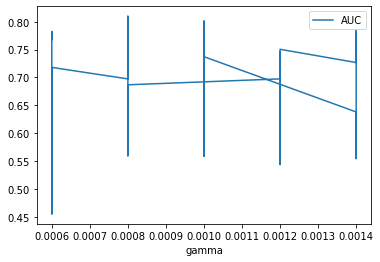

In [99]:
aucs_df.plot(x="gamma",y="AUC",)

In [159]:
keys=tuple(map(lambda v: "{:3.1e}".format(gamm_v(v)),NINF.keys()))

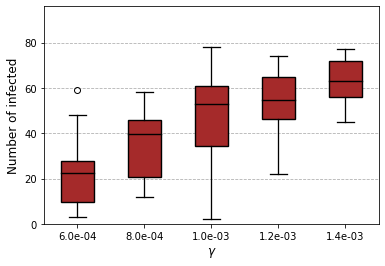

In [186]:
plt.figure(figsize=(6,4))
plt.grid(ls="--",axis="y")
bp=plt.boxplot(NINF.values(),labels=keys,patch_artist=True)
for m in bp["medians"]:
    m.set_color("black")
    m.set_linewidth(1.4)

for b in bp['boxes']:
    b.set_linewidth(1.4)
    b.set_facecolor("brown")
for w in bp["whiskers"]:
    w.set_linewidth(1.3)
    #w.set_color("grey")
for uu in bp['caps']:
    uu.set_linewidth(1.3)
    #uu.set_color("grey")
plt.ylim((0,96))
plt.ylabel("Number of infected", fontsize=12)
plt.xlabel("$\gamma$", fontsize=12)
plt.savefig("resu/n_inf_gamma_auc.pdf",dpi=200,bbox_inches="tight")

In [102]:
getcolor=plt.get_cmap("Greens")
col_SM=getcolor(np.linspace(0.5,0.8,3))[::-1]

In [109]:
import matplotlib.ticker as tick

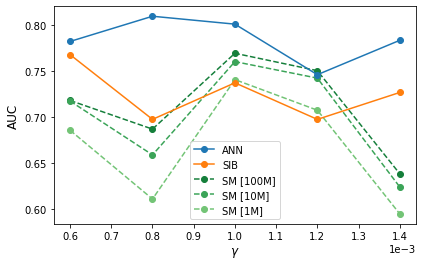

In [194]:
c=0
plt.figure(figsize=(6.5,4))
for alg, d in aucs_df.groupby("algo"):
    d.sort_values("gamma", inplace=True)
    if alg=="random":
        continue
    if "SM" in alg:
        extra=dict(color=col_SM[c], ls="--",zorder=-1)
        c+=1
    else:
        extra =dict()
    plt.plot(d.gamma, d.AUC, marker="o",label=alg, **extra)
plt.legend()
plt.ylabel("AUC",fontsize=12)
#print(plt.xticks())
ax=plt.gca()
fmt=tick.ScalarFormatter()
fmt.set_powerlimits((-2,3))
ax.get_xaxis().set_major_formatter(fmt)
#plt.tick_params(axis="x",labelrotation=40)
#plt.xticks(*plt.xticks(),rotation=20)
plt.xlabel("$\gamma$",fontsize=12)

plt.savefig("AUC_gamma_range.pdf",dpi=200,bbox_inches="tight")

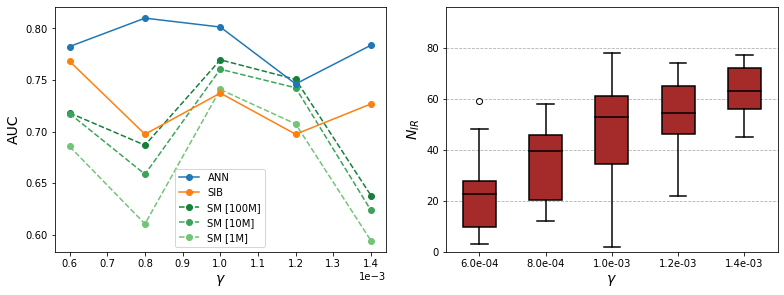

In [207]:
c=0
f,axis=plt.subplots(1,2,figsize=(11,4.2))
plt.sca(axis[0])
for alg, d in aucs_df.groupby("algo"):
    d.sort_values("gamma", inplace=True)
    if alg=="random":
        continue
    if "SM" in alg:
        extra=dict(color=col_SM[c], ls="--",zorder=-1)
        c+=1
    else:
        extra =dict()
    plt.plot(d.gamma, d.AUC, marker="o",label=alg, **extra)
plt.legend()
plt.ylabel("AUC",fontsize=14)
#print(plt.xticks())
ax=plt.gca()
fmt=tick.ScalarFormatter()
fmt.set_powerlimits((-2,3))
ax.get_xaxis().set_major_formatter(fmt)
#plt.tick_params(axis="x",labelrotation=40)
#plt.xticks(*plt.xticks(),rotation=20)
plt.xlabel("$\gamma$",fontsize=14)

plt.sca(axis[1])
plt.grid(ls="--",axis="y")
bp=plt.boxplot(NINF.values(),labels=keys,patch_artist=True)
for m in bp["medians"]:
    m.set_color("black")
    m.set_linewidth(1.5)

for b in bp['boxes']:
    b.set_linewidth(1.5)
    b.set_facecolor("brown")
for w in bp["whiskers"]:
    w.set_linewidth(1.5)
    #w.set_color("grey")
for uu in bp['caps']:
    uu.set_linewidth(1.5)
    #uu.set_color("grey")
plt.ylim((0,96))
plt.ylabel("$N_{IR}$", fontsize=14)
plt.xlabel("$\gamma$", fontsize=14)

plt.tight_layout(w_pad=2)

plt.savefig("AUC_gamma_range_both.pdf",dpi=300,bbox_inches="tight")